*week 2 exercise - part 1*

# Basic Charts with Matplotlib

## Matplotlib

First, we import the required libraries, using standard conventions. We first import numpy for all our mathematical needs, then the matplotlib as plotting library and pyplot which gives an easy API to create plots with matplotlib. Later we will introduce Seaborn as well.

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# we need the following line to indicate that the plots should be shown inline with the Jupyter notebook.
%matplotlib inline 

We will first create a simple plot of a mathematical function. We first create a numpy array of x-values. Then for each x-value we create the y-value, i.e. the function value. Plotting this function is as easy as giving it the x and y values.

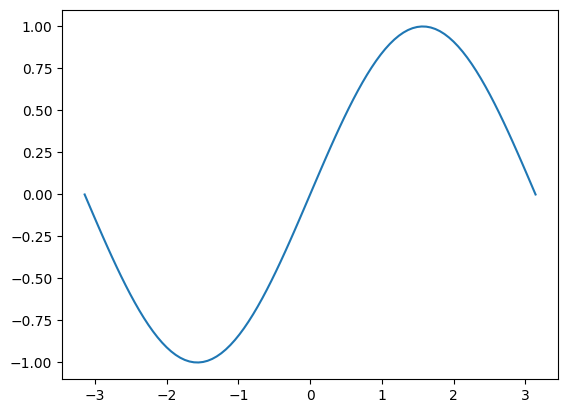

In [2]:
X = np.linspace(-np.pi, np.pi, 100) # define a NumPy array with 100 points in the range -Pi to Pi
Y = np.sin(X)  # define the curve Y by the sine of X

plt.plot(X,Y); # use matplotlib to plot the function

While creating such plots is perfectly fine when you are exploring data, in your final notebook the plot is hard to understand for the reader. With matplotlib it is very easy to add labels, a title and a legend. You can also change the limits of the plot, the style of the lines and much more.

The following could be seen as the bare minimum for a plot to be understood as part of reproducible research.

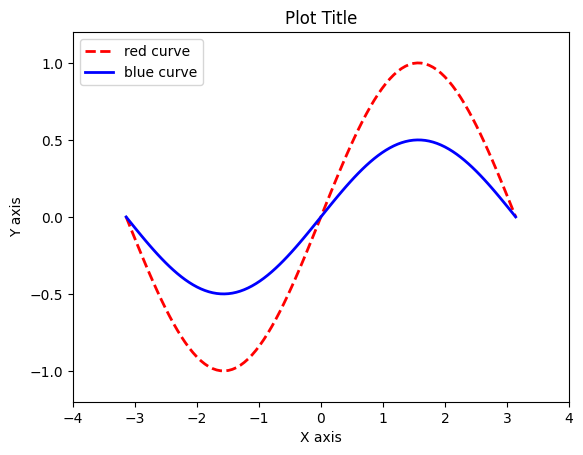

In [3]:
plt.plot(X, Y, 'r--', linewidth=2)
plt.plot(X, Y/2, 'b-', linewidth=2)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Plot Title')
plt.xlim(-4, 4)
plt.ylim(-1.2, 1.2)
plt.legend(['red curve', 'blue curve'], loc='best')

Go to the documentation pages of Matplotlib [http://matplotlib.org/contents.html](http://matplotlib.org/contents.html) to find all the possible options for a plot and also to see more tutorials, videos and book chapters to help you along the way.

Another nice tutorials:
* [http://www.labri.fr/perso/nrougier/teaching/matplotlib/](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

This assignment first shows you how to download csv data from an online source. Then we're exploring a dataset of all the cities in the world and compare cities in The Netherlands to the rest of the world.

## Loading data CSV and Pandas
We will work with a database of information about cities around the world:

[https://dev.maxmind.com/geoip/geoip2/geolite2/](https://dev.maxmind.com/geoip/geoip2/geolite2/)

Working with data structures can be done in many ways in Python. There are the standard Python arrays, lists and tuples. You can also use the arrays in the numpy package which allow you to do heavy math operations efficiently. For data analysis Pandas is often used, because data can be put into so-called dataframes. Dataframes store data with column and row names and can easily be manipulated and plotted. You will learn more about Pandas in the Machine Learning workshops. A short intro can be found here:

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [4]:
import urllib.request as urllib, zipfile, os

url = 'https://github.com/CODAIT/redrock/raw/master/twitter-decahose/src/main/resources/Location/'
filename = 'worldcitiespop.txt.gz'
datafolder = 'data/'

In [5]:
downloaded = urllib.urlopen(url + filename)
buf = downloaded.read()

try:
    os.mkdir(datafolder)
except FileExistsError:
    pass

with open(datafolder + filename, 'wb') as f:
    f.write(buf)

In [6]:
import pandas as pd
# reading files may cause problems or give errors... Can you explain the use of the encoding parameter?
cities = pd.read_csv(datafolder + filename, sep=',', low_memory=False, encoding = 'ISO-8859-1')

## Data Manipulation

We can take a peek at the data by checking out the final rows of data. Do you see any potential problem with this dataset?

In [7]:
cities.tail()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
3173953,zw,zimre park,Zimre Park,04,NaN,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,00,NaN,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,04,NaN,-17.758889,31.010556
3173956,zw,zuzumba,Zuzumba,06,NaN,-20.033333,27.933333
3173957,zw,zvishavane,Zvishavane,07,79876.0,-20.333333,30.033333


In [8]:
cities.sort_values(by='Population', ascending=False).head(10)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
1544449,jp,tokyo,Tokyo,40,31480498.0,35.685000,139.751389
570824,cn,shanghai,Shanghai,23,14608512.0,31.045556,121.399722
1327914,in,bombay,Bombay,16,12692717.0,18.975000,72.825833
2200161,pk,karachi,Karachi,05,11627378.0,24.905600,67.082200
1349146,in,new delhi,New Delhi,07,10928270.0,28.600000,77.200000
1331162,in,delhi,Delhi,07,10928270.0,28.666667,77.216667
2130459,ph,manila,Manila,D9,10443877.0,14.604200,120.982200
2461968,ru,moscow,Moscow,48,10381288.0,55.752222,37.615556
1626528,kr,seoul,Seoul,11,10323448.0,37.598500,126.978300
316800,br,sao paulo,São Paulo,27,10021437.0,-23.473293,-46.665803


By sorting the cities on population we immediately see the entries of a few of the largest cities in the world.

## Assignment 1a
To get an idea of where in the world the cities in the dataset are located, we want to make a scatter plot of the position of all the cities in the dataset.

Don't worry about drawing country borders, just plot the locations of the cities.

Remember to use all the basic plot elements you need to understand this plot.

c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


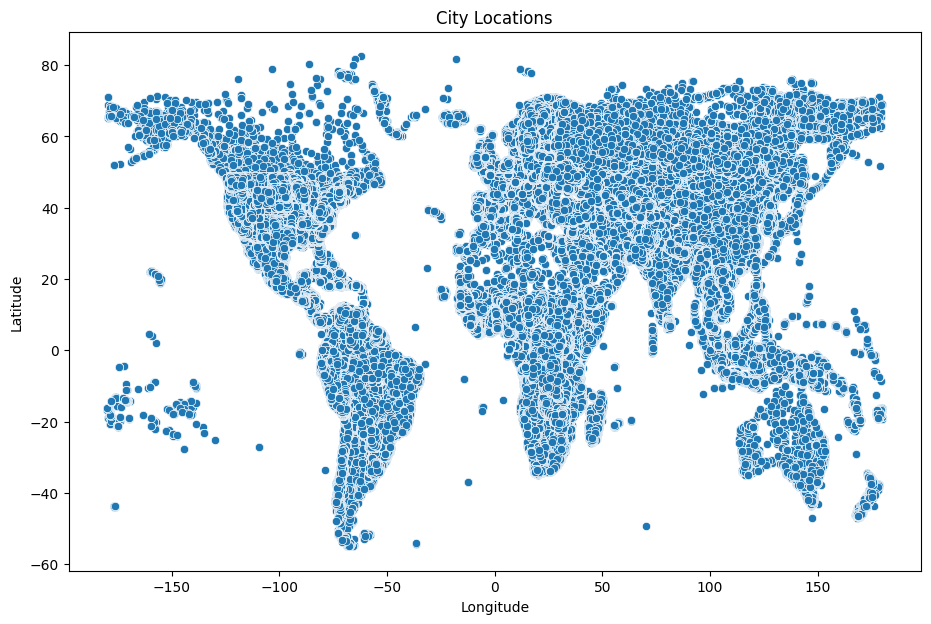

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns #importing seaborn for the plot
%matplotlib inline 

# Create a scatter plot
plt.figure(figsize=(11, 7)) 
 # Making the figure size


sns.scatterplot( cities,x="Longitude", y="Latitude")


plt.title("City Locations")
plt.ylabel("Latitude")
plt.xlabel("Longitude")

# setting the names of the labels
plt.show()

## Your code and explanation in comments...


## Assignment 1b

Now we want to plot the cities in The Netherlands only. Use a scatter plot again to plot the cities, but now vary the size of the marker and the color with the population of that city.

Use a colorbar to show how the color of the marker relates to its population.

Use sensible limits to your axes so that you show only mainland The Netherlands (and not the Dutch Antilles).

c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

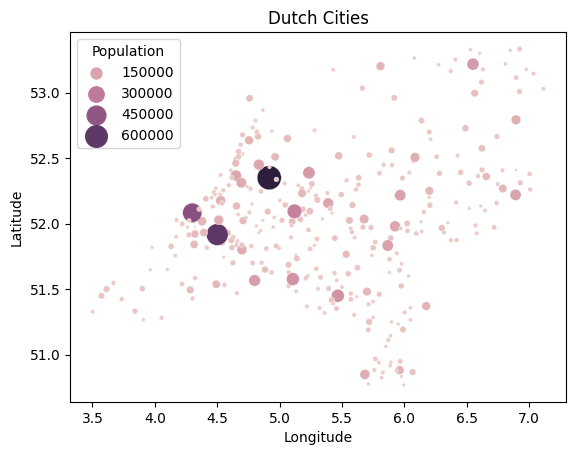

In [40]:
import seaborn as sb
from matplotlib import pyplot as plt


dutch_cities = cities[ cities['Country'] =='nl' ]
# Create a scatter plot using Seaborn

##setting the size of the dots and their hue based on the population number


sb.scatterplot(dutch_cities, x="Longitude", y="Latitude", size="Population", hue="Population", sizes=(3, 300))

plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Dutch Cities")

#setting the labels


# Show the plot
plt.show()


## Your code and explanation in comments...


## Assignment 1c

Using assignment B, we could clearly see larger cities such as Amsterdam, Rotterdam and even Eindhoven. But we still do not really have a clear overview of how many big cities there are. To show a distribution we use a histogram plot.

What happens if we do not call the .dropna() function?

Add proper basic plot elements to this plot and try to annotate which data point is Amsterdam and Eindhoven.

c:\Users\denic\miniconda3\lib\site-packages\matplotlib\text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
c:\Users\denic\miniconda3\lib\site-packages\matplotlib\text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
c:\Users\denic\miniconda3\lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))


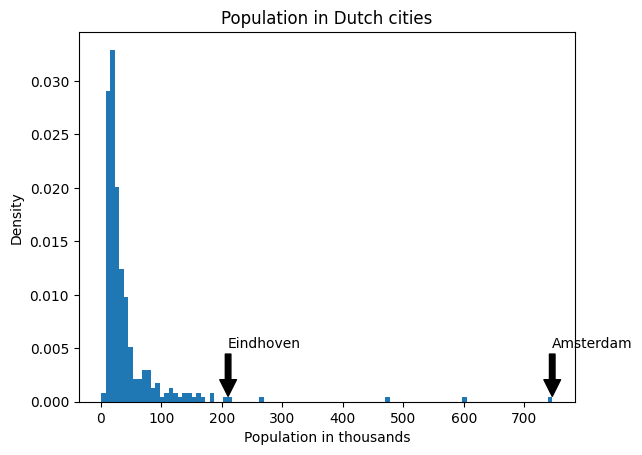

In [11]:
plt.figure();
plt.hist(np.asarray(dutch_cities.dropna().Population/1000), 100, density=1)
# dropna() has no effect, hist() already ignores Na-values

## Your code and explanation in comments...
pop_amsterdam = dutch_cities[ dutch_cities['City'] == 'amsterdam'].Population/1000
pop_eindhoven = dutch_cities[ dutch_cities['City'] == 'eindhoven'].Population/1000

plt.xlabel("Population in thousands")
plt.title("Population in Dutch cities")
plt.ylabel("Density")
##setting the labels 

plt.annotate("Amsterdam", (pop_amsterdam,0.0005), (pop_amsterdam, 0.005), arrowprops=dict(facecolor='black', shrink=0.0005));
plt.annotate("Eindhoven", (pop_eindhoven,0.0005), (pop_eindhoven, 0.005), arrowprops=dict(facecolor='black', shrink=0.0005));

plt.show()

## Assignment 1d

Now we want to compare how the distribution of Dutch cities compares to that of the entire world.

Use subplots to show the dutch distribution (top plot) and the world distribution (bottom plot).

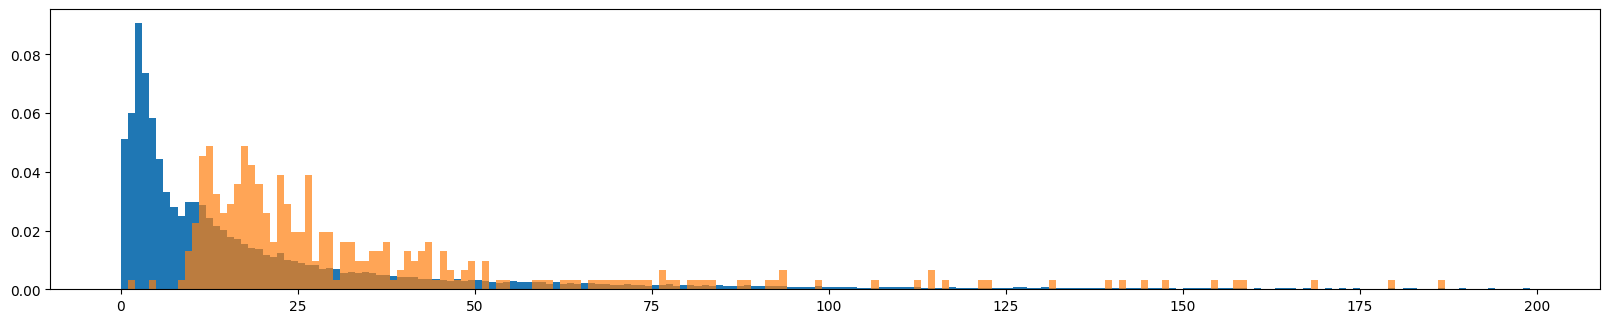

In [12]:

plt.figure(figsize=[20, 8]);
plt.subplot(2,1,1);
plt.hist(np.asarray(cities.Population/1000), bins=np.arange(0, 200, 1), density=1) #made another histogram 
plt.hist(np.asarray(dutch_cities.Population/1000), bins=np.arange(0, 200, 1), density=1,alpha=0.7);
 ##i removed the .dropna() since there is the hist the command which is already remove the nan values
# and making the color a little bit transperent so we ca properly see the differences 
# Add the subplot of the world cities below this Dutch one

## Your code and explanation in comments...


## Assignment 1e

Write what conclusions you can deduce from the above plots?

Based on the first assignment, we can see that only with two variables we can make a very good plot. In this case I used the longitude and the latitiude with seaborn. 
In the second one I used seaborn again and I set the size of the dots to be the population, tried some sizes and put the one that I belive fit best. In the third I put the labels and there were already arrows showing the cities. For the last assignment I created another plot and in order to properly see the results I added transperency.With all the above mentioneed I can say that with proper chart you can see clear results of data.

*week 2 exercise - part 2*

# Data visualization: Two additional Chart Types for Exploring

This assignment first shows two useful chart types: parallel coordinates and scatter matrix. You will practice these plots using a new dataset.

## Parallel Coordinates with Pandas

First, we import the required libraries, using standard conventions. For the example of parallel coordinates we shall use the famous iris data set, describing the sepal and petal dimensions for three types of irises.

In [13]:
import pandas as pd
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', sep=',', low_memory=False, encoding = 'ISO-8859-1', header=None)
iris.columns = ['sepal width','sepal length','petal width','petal length', 'name']

iris.head()

,sepal width,sepal length,petal width,petal length,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now we do not use matplotlib directly but use a plot function of the pandas library that uses matplotlib in the background. In this case we create a parallel coordinates plot.

Pandas has many plotting function as can be seen here: http://pandas.pydata.org/pandas-docs/stable/visualization.html#parallel-coordinates

The parallel coordinates plot can give insight into a dataset with a large number of features. For the iris set there are four features (petal width, petal length, sepal width, sepal length).

While you can make a scatter plot with 4 features using x,y,color and size; a parallel coordinates plot is usually easier to understand once you know how to read it. Here would be the scatter plot:

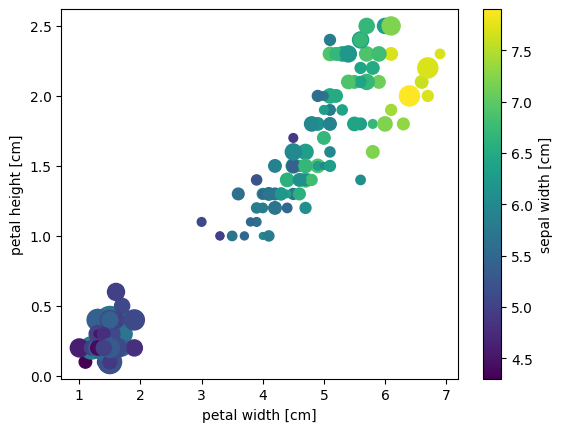

In [14]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure()
plt.scatter(iris['petal width'], iris['petal length'], c=iris['sepal width'], s=iris['sepal length']**4)
plt.xlabel('petal width [cm]')
plt.ylabel('petal height [cm]')
plt.colorbar(label='sepal width [cm]');

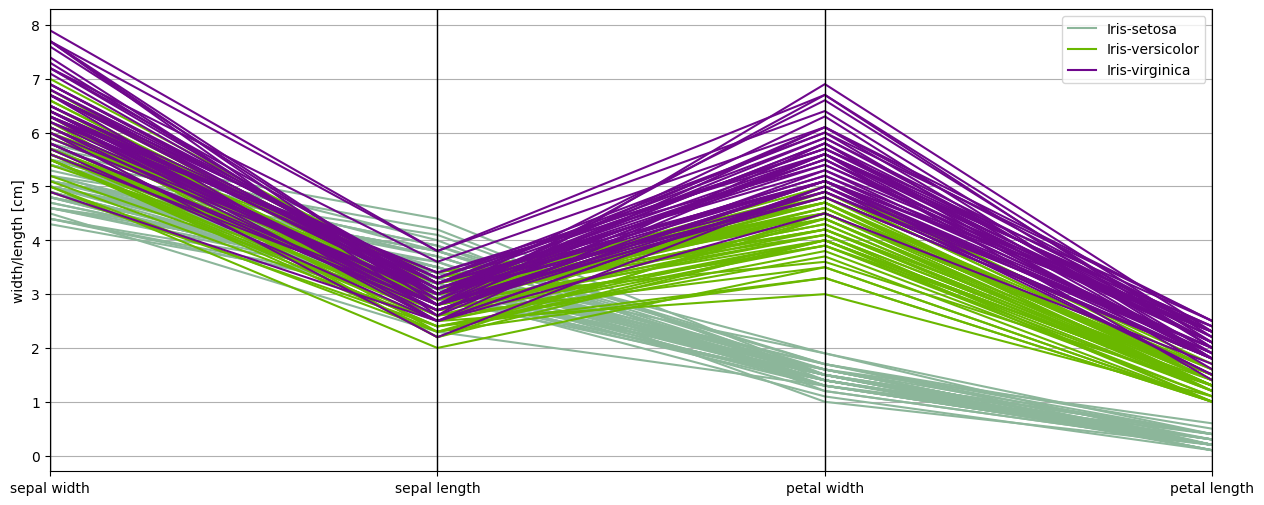

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates
%matplotlib inline 

fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(iris,'name')
ax.set_ylabel('width/length [cm]');

## Scatter Matrix with Pandas

A scatter matrix is a chart that gives you an overview of the correlations between any number of feaures.

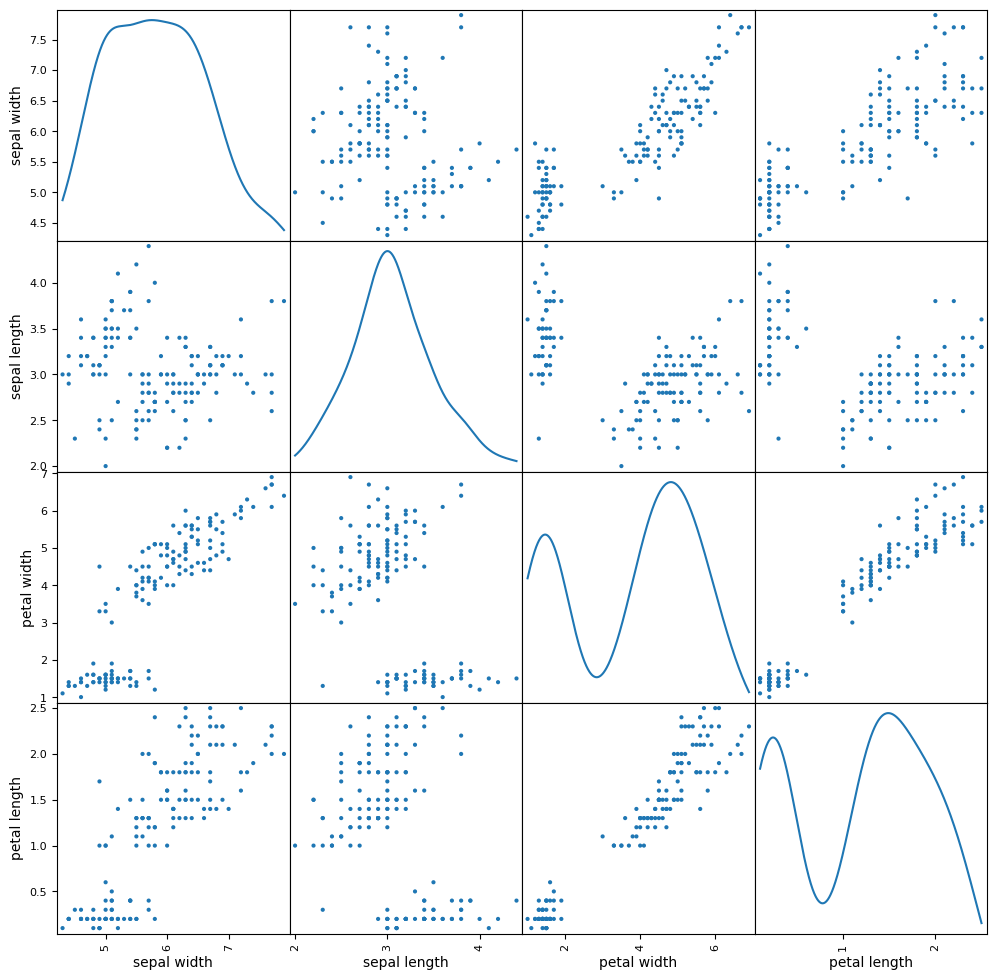

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris, alpha=1, figsize=(12, 12), diagonal='kde');

c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

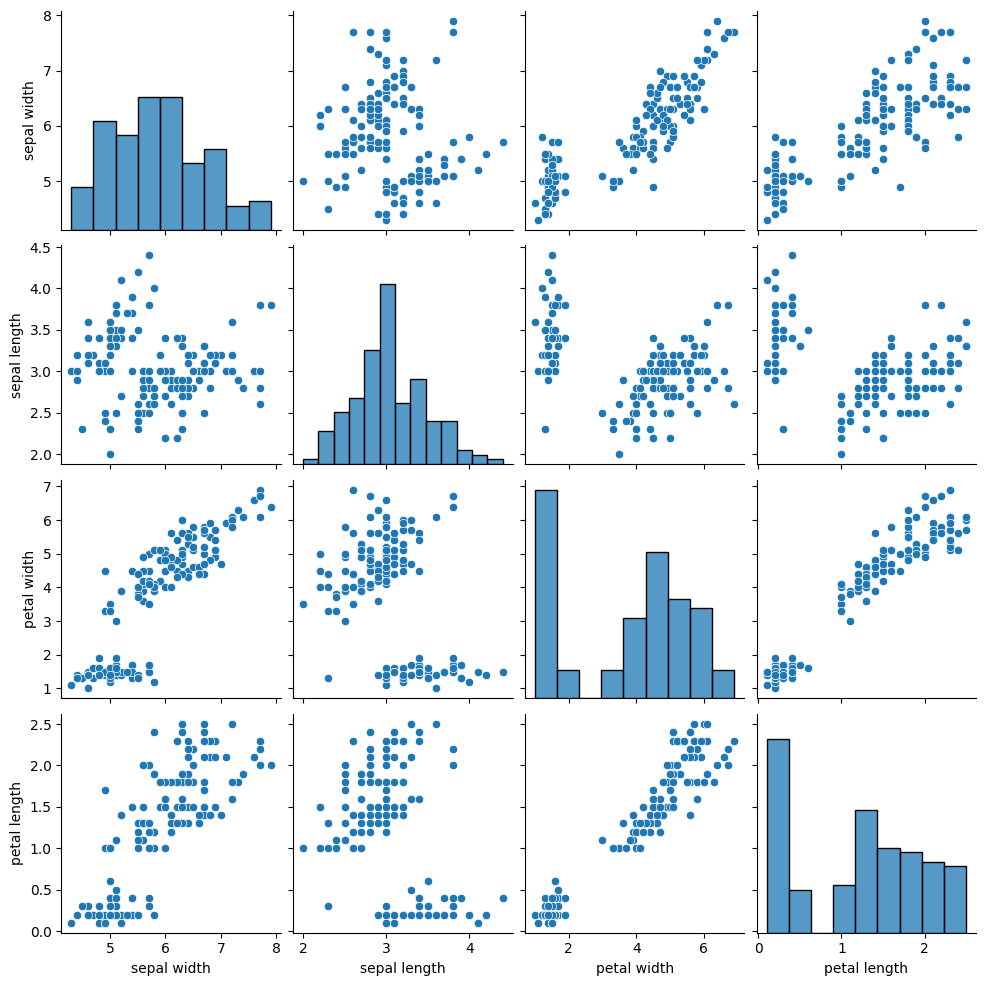

In [26]:
# or see what happens if we use the Seaborn library...
import seaborn as sns
sns.pairplot(iris);

c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

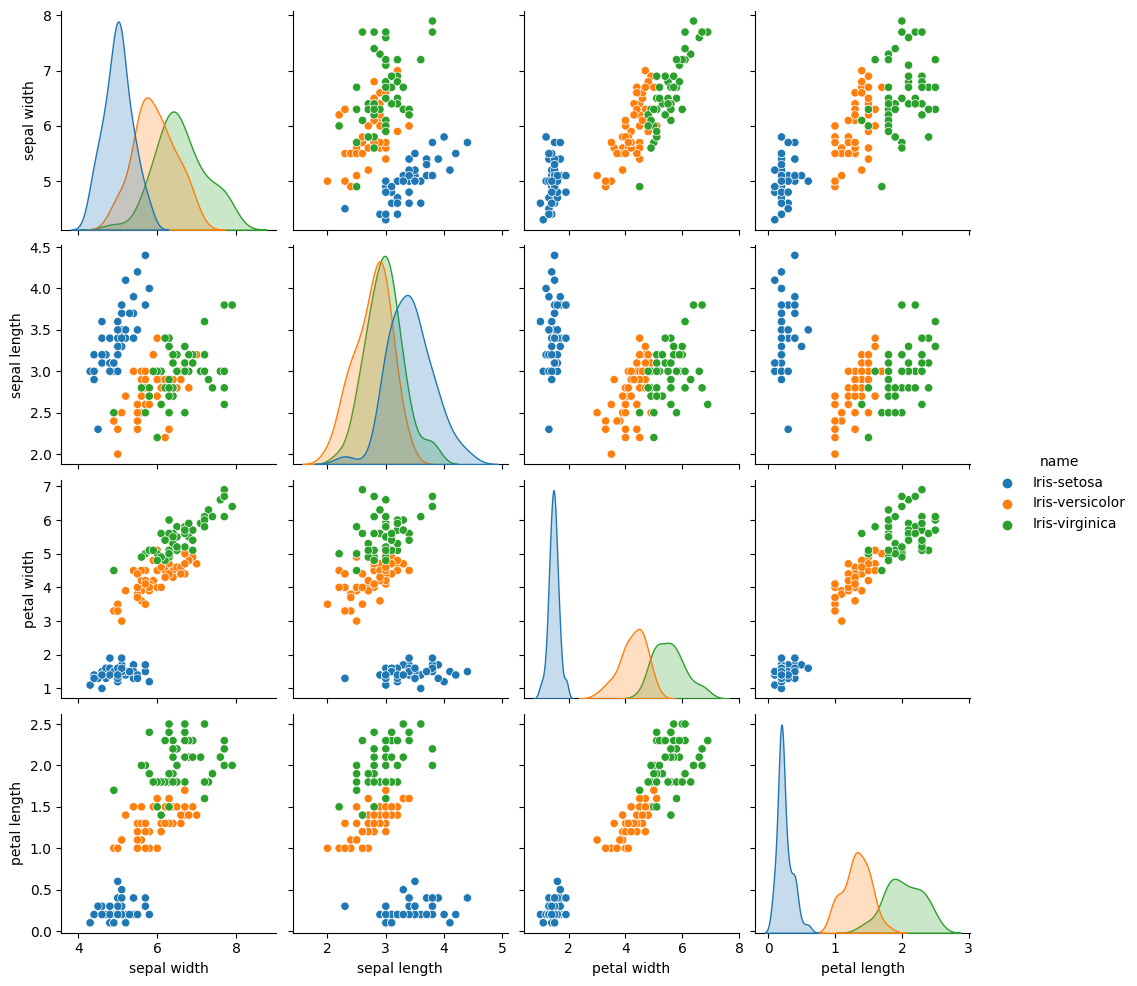

In [18]:
# Seaborn provides some simples ways to explore the data and correlations in more (visual) detail...
import seaborn as sns
sns.pairplot(iris, hue="name")

## Assignment
Now try to create similar plots for a new dataset about car features.

c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

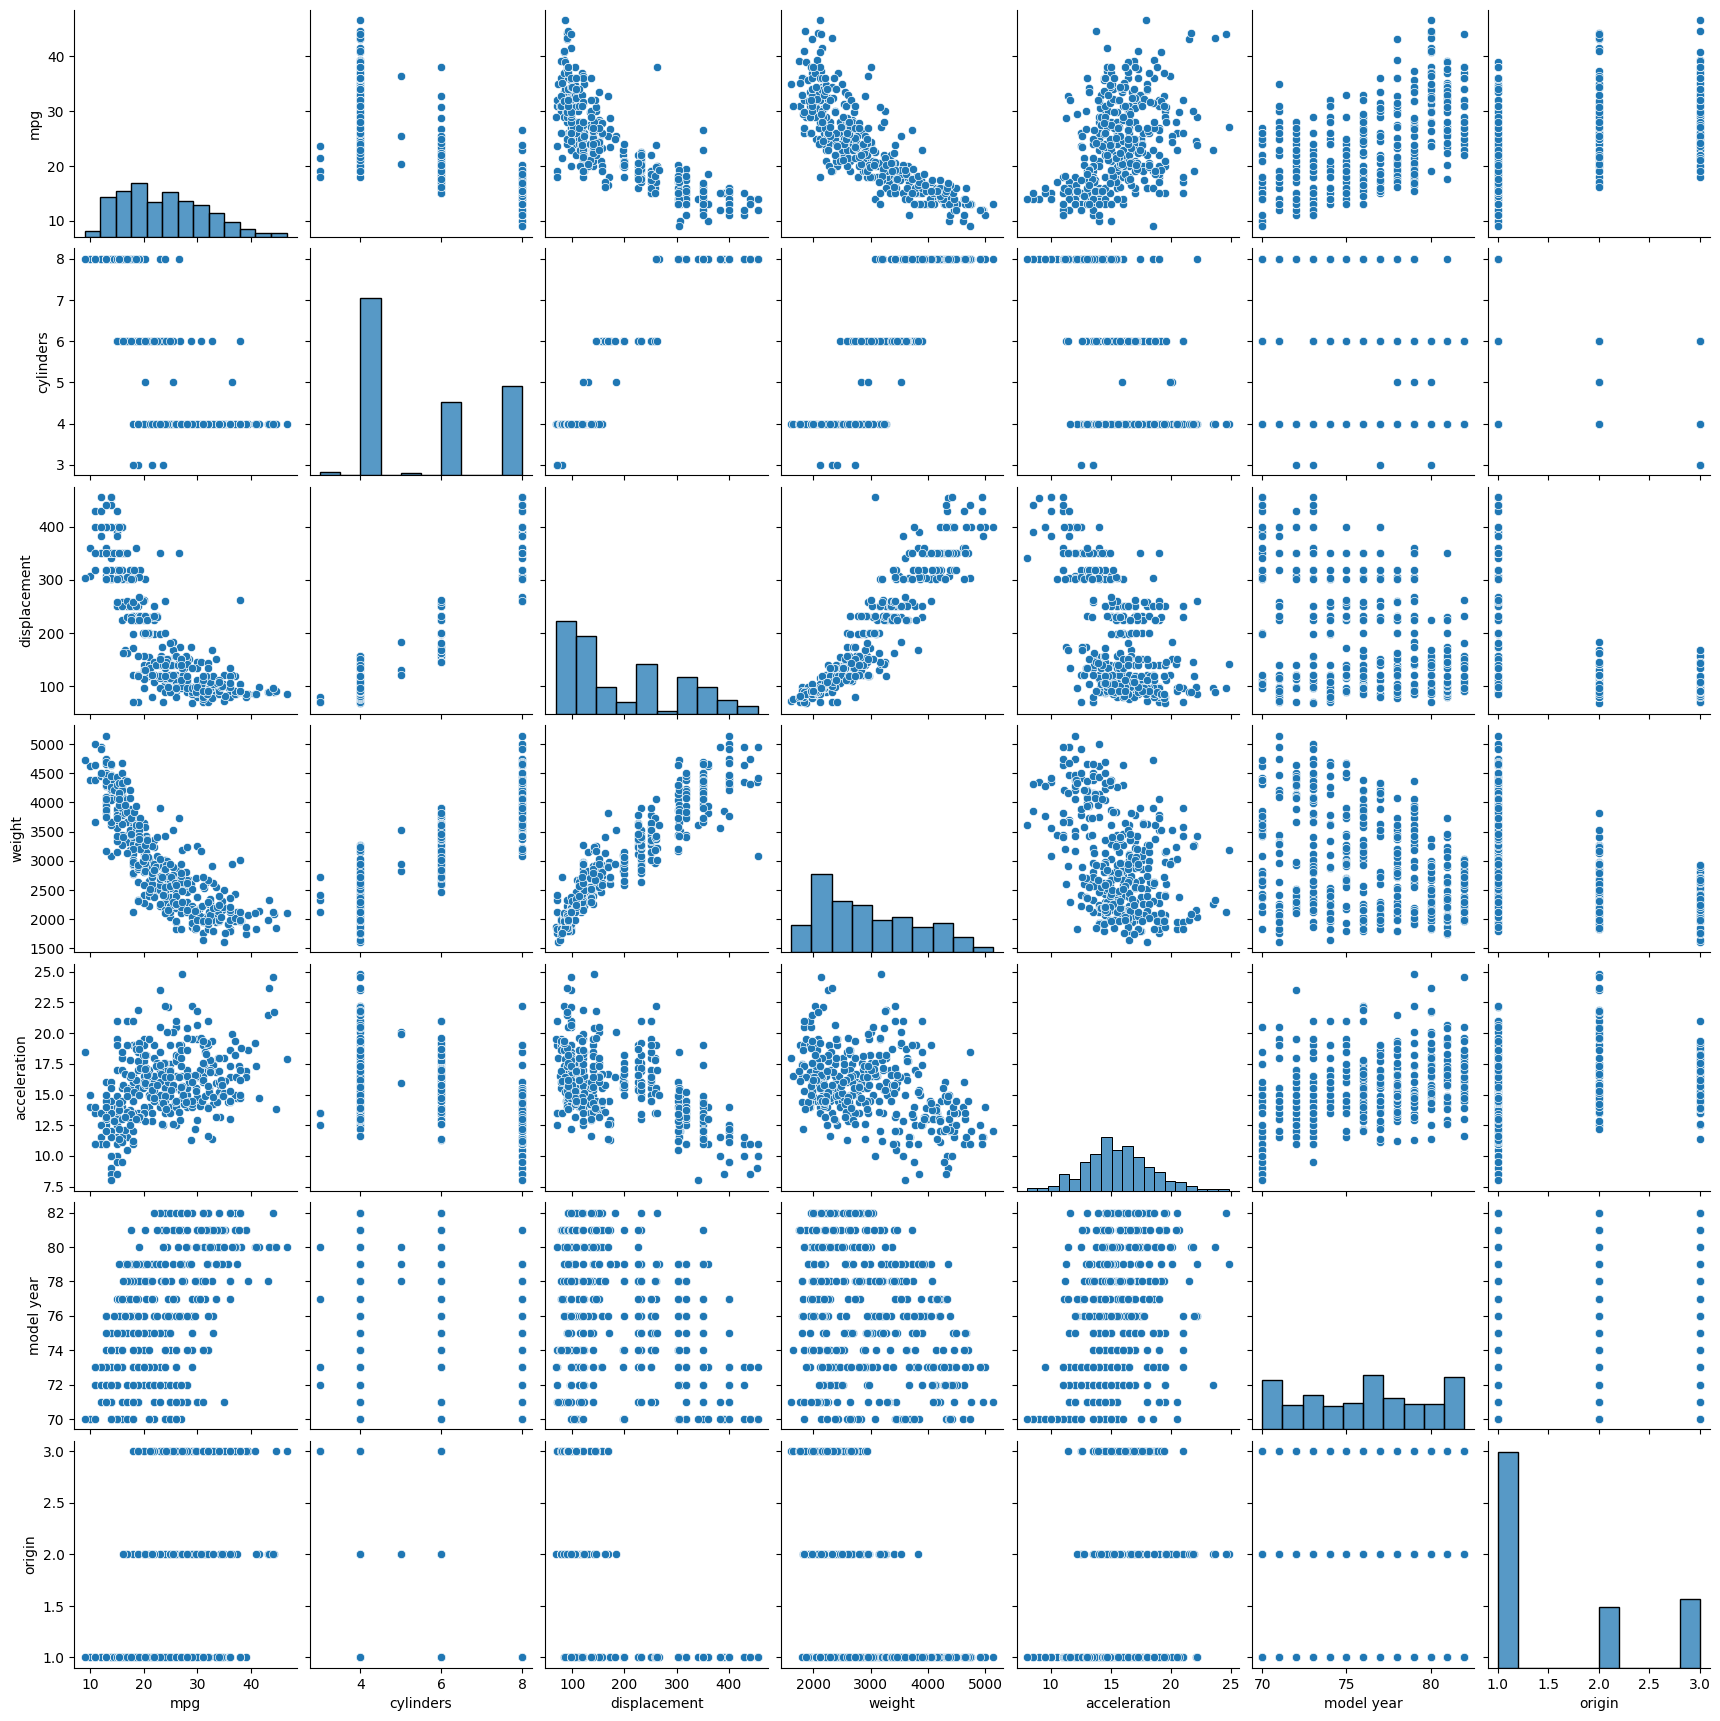

In [151]:
import seaborn as sb
%matplotlib inline 

# The data file is quite nasty with several different delimeters that read_csv cannot handle very well
names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name','j','k','l','m','n']
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delimiter=r"\s+", names=names, header=None, engine='python')
# Create a subset of dataset with all useful features

sb.pairplot(cars);
# cars



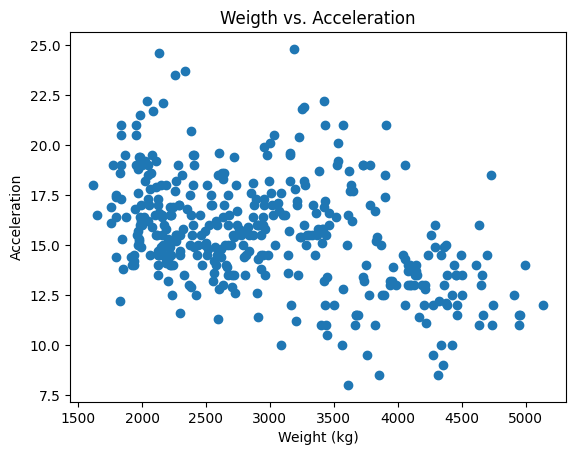

In [152]:
import seaborn as sb
%matplotlib inline 

# The data file is quite nasty with several different delimeters that read_csv cannot handle very well

# cars = cars.iloc[:,[0,1,2,4,5,6,7]]
plt.scatter(cars['weight'], cars['acceleration'])
plt.xlabel('Weight (kg)')
plt.ylabel('Acceleration')
plt.title('Weigth vs. Acceleration')
plt.show()

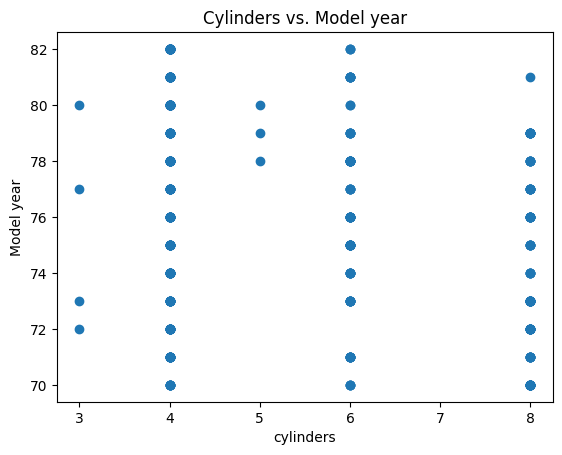

In [150]:
import seaborn as sb
%matplotlib inline 

# The data file is quite nasty with several different delimeters that read_csv cannot handle very well

# cars = cars.iloc[:,[0,1,2,4,5,6,7]]
plt.scatter(cars['cylinders'], cars['model year'])
plt.xlabel('cylinders')
plt.ylabel('Model year')
plt.title('Cylinders vs. Model year')
plt.show()

# Create a normalized dataset
using Mean normalization (see: https://en.wikipedia.org/wiki/Feature_scaling#Mean_normalization)

In [86]:

cars_norm = cars-(cars.mean())/ cars.std()
cars_norm 


,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,14.991476,4.793204,305.144949,3500.49235,6.35466,49.443557,-0.961043
1,11.991476,4.793204,348.144949,3689.49235,5.85466,49.443557,-0.961043
2,14.991476,4.793204,316.144949,3432.49235,5.35466,49.443557,-0.961043
3,12.991476,4.793204,302.144949,3429.49235,6.35466,49.443557,-0.961043
4,13.991476,4.793204,300.144949,3445.49235,4.85466,49.443557,-0.961043
...,...,...,...,...,...,...,...
393,23.991476,0.793204,138.144949,2786.49235,9.95466,61.443557,-0.961043
394,40.991476,0.793204,95.144949,2126.49235,18.95466,61.443557,0.038957
395,28.991476,0.793204,133.144949,2291.49235,5.95466,61.443557,-0.961043
396,24.991476,0.793204,118.144949,2621.49235,12.95466,61.443557,-0.961043


Next, create a parallel coordinates plot. What happens when you do not use the normalized data?

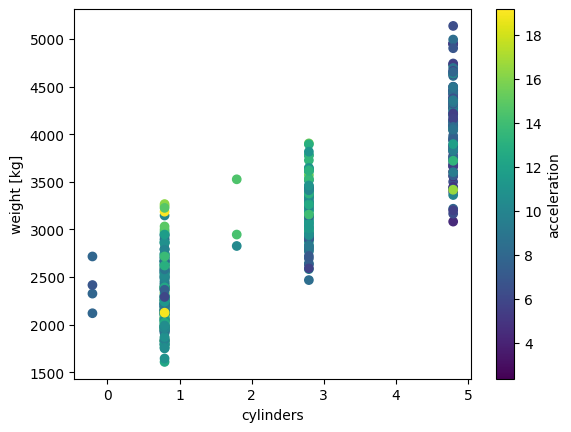

In [187]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure()
plt.scatter(cars_norm['cylinders'], cars_norm['weight'], c=cars_norm['acceleration'])
plt.xlabel('cylinders')
plt.ylabel('weight [kg]')
plt.colorbar(label='acceleration');

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,j,k,l,m,n
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet",chevelle,"malibu""",None,None,None
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick",skylark,"320""",None,None,None
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth","satellite""",None,None,None,None
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc",rebel,"sst""",None,None,None
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford","torino""",None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford",mustang,"gl""",None,None,None
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw","pickup""",None,None,None,None
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge","rampage""",None,None,None,None
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford","ranger""",None,None,None,None


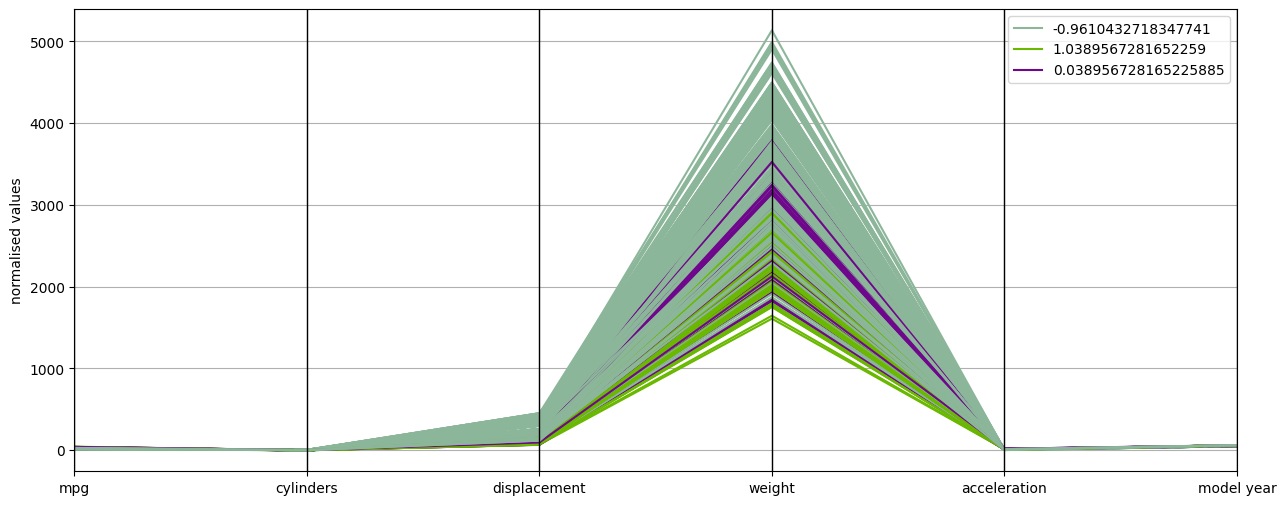

In [158]:
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates


fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(cars_norm,'origin')
ax.set_ylabel('normalised values')

cars

Answer this question: What conclusions can you make from the relation between weight and acceleration? If you don't understand how to interpret parallel coordinates plots, read: https://eagereyes.org/techniques/parallel-coordinates.


In [188]:
## Answer here in Markdown


Based on the plot, I can see that the weight plays a big role in determening the acceleration. Heavier weight, it results in reduced acceleration values. 


Next, try to highlight the model years >= 80. 

Hints: 
* you can slice your data with ```cars_norm[cars['model year']>=80]```.
* you can plot both all data and the sliced data on top of each other with different colors  

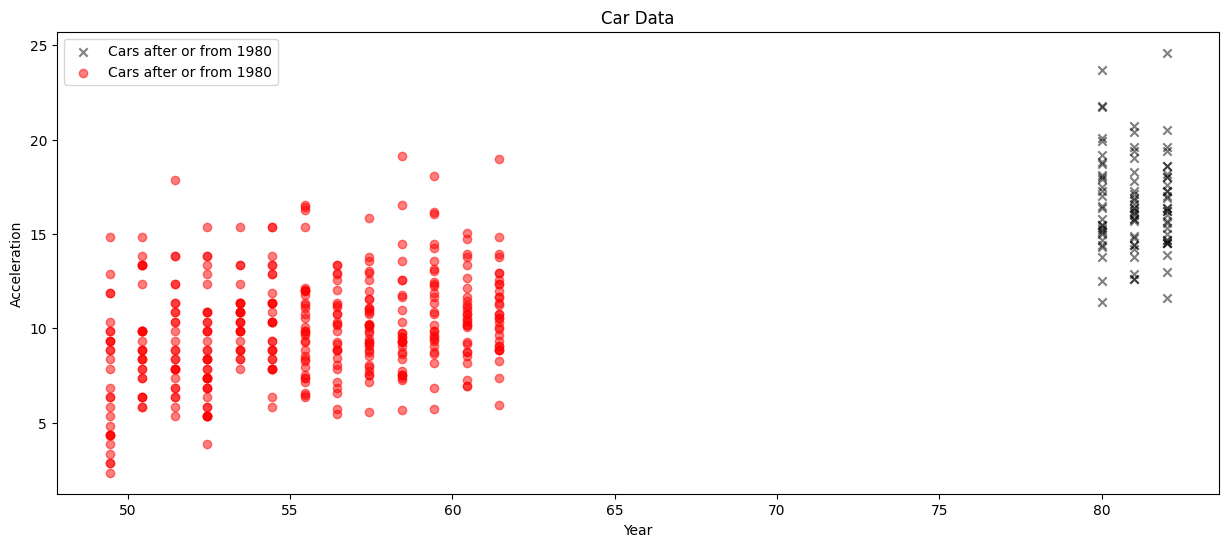

In [195]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15, 6])
cars_new = cars[cars['model year'] >= 80]
cars_new

plt.scatter(cars_new['model year'], cars_new['acceleration'], label='Cars after or from 1980', alpha=0.5, marker='x', c='black')
plt.scatter(cars_norm['model year'], cars_norm['acceleration'], label='Cars after or from 1980', alpha=0.5, marker='o', c='red')

plt.ylabel('Acceleration')
plt.title('Car Data')
plt.xlabel('Year')

plt.legend()

plt.show()






Answer this question: what conclusions can you draw from cars with model years 80-82?

C:\Users\denic\AppData\Local\Temp\ipykernel_9396\3790016462.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_new['dataset'] = 'Cars from and during the 80s'


<Figure size 1200x1200 with 0 Axes>

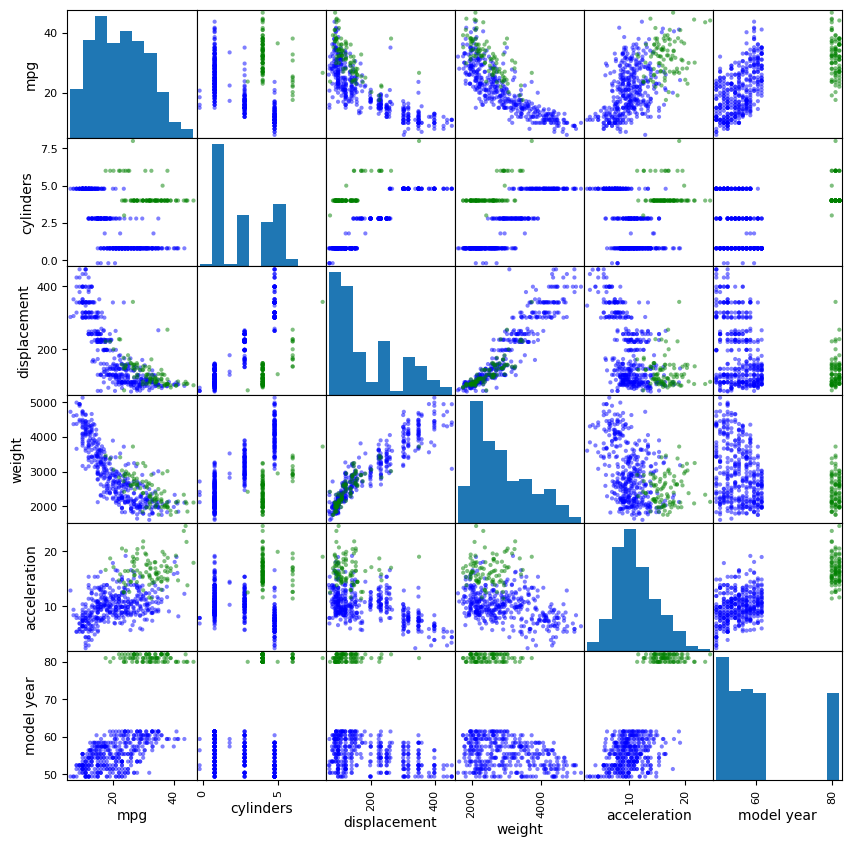

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

cars_norm['dataset'] = 'All Cars'
cars_new['dataset'] = 'Cars from and during the 80s'

combined_data = pd.concat([cars_norm, cars_new], ignore_index=True)

plt.figure(figsize=(12, 12))
scatter_matrix(
    combined_data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']],
    c=combined_data['dataset'].map({'All Cars': 'blue', 'Cars from and during the 80s': 'green'}),
    figsize=(10,10)
)

plt.show();


In [24]:
## Answers here in Markdown


There were a couple of options to show results based on the model year, but what was the first thing I wanted to show is the fact that with every new model the acceleration is getting higher values. There were huge differencies between the data for weight with model year, displacement and model year, cylinders and model year. 

Now, create a scatter matrix for the car data. 
Do we need to use the normalized data?
Are we looking for a dataset that we can easily cluster or will we get more luck looking for trends?


Using the normalized data, makes the scatter matrix more meaningful. It depends on what we want to achieve and see. If our goal is to aim at realtionships between variables without being influenced by their scales , the normalized data could be useful. On the other hand if we wabt ti see the original context of the data, unnormalized data would be a better choice. 

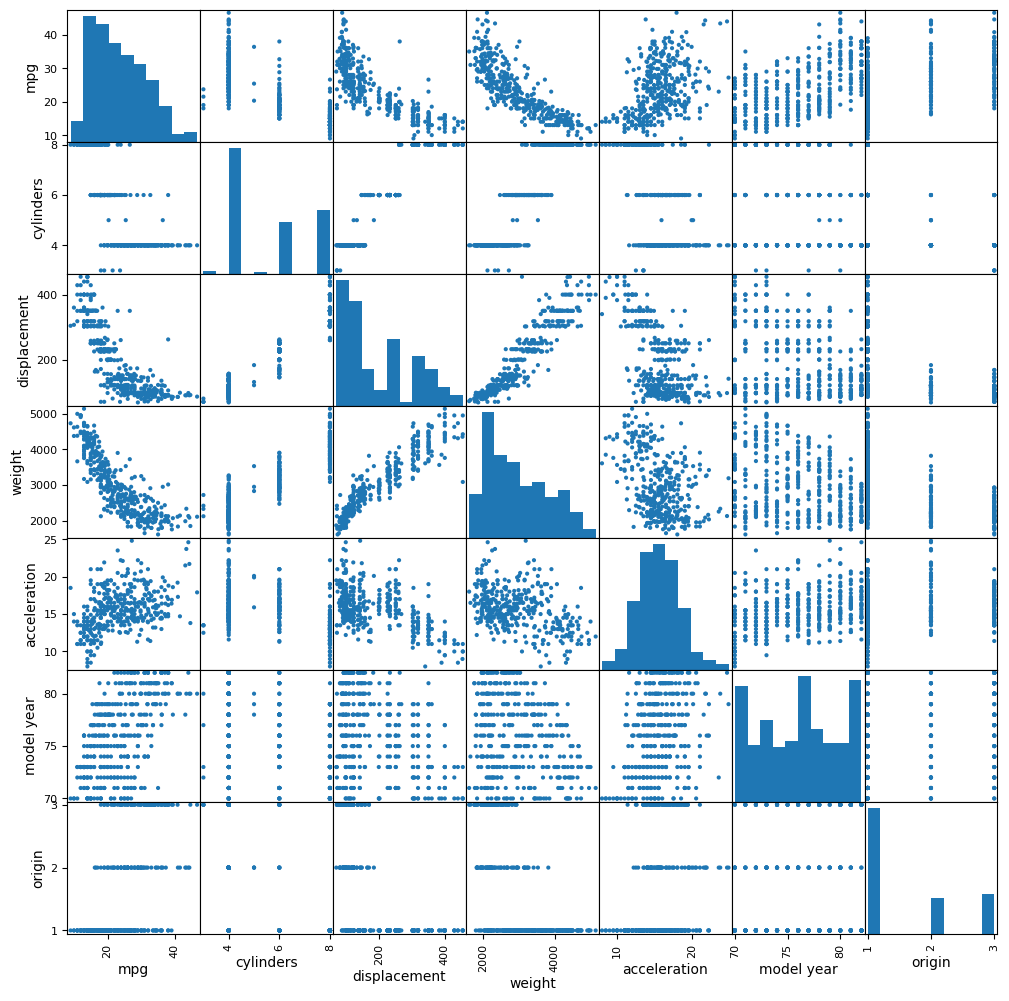

In [182]:
## Create the scatter matrix here
from pandas.plotting import scatter_matrix
scatter_matrix(cars,alpha=1, figsize=(12,12));




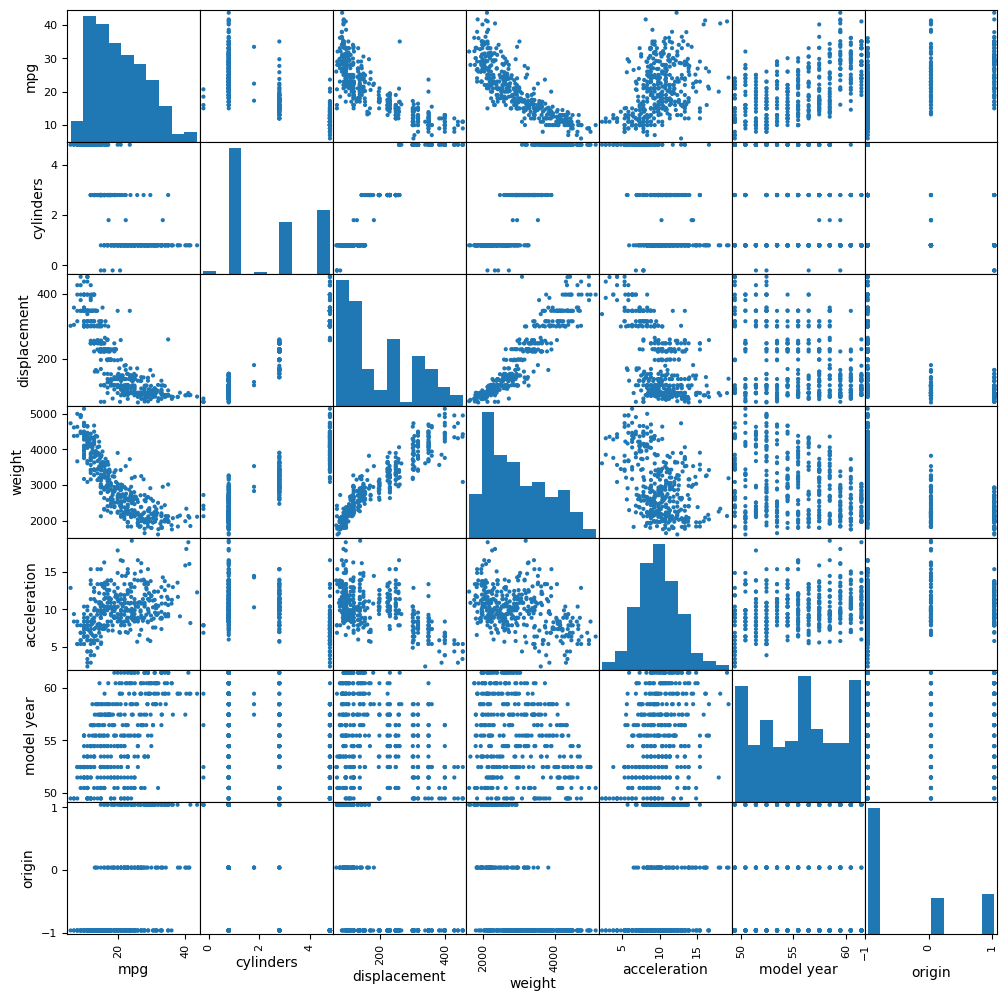

In [181]:
## Create the scatter matrix here
from pandas.plotting import scatter_matrix
scatter_matrix(cars_norm,alpha=1, figsize=(12,12));




*What are your final conclusions looking at the (visual) results? What did you learn about the data and dataset? Or what new questions did you derive from the plots you've made?*

Visualization helps us understand information, it helps us explore relationships between variables, we can see trends over the time.